/var/folders/xt/5rbkzcgj5svb0mhwz64m8g1m0000gn/T/ipykernel_3178/3240485026.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_classes))


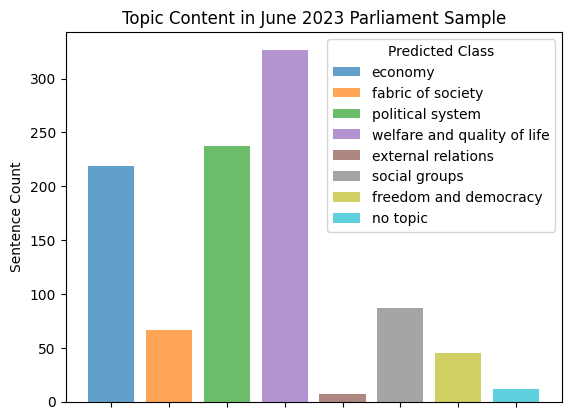

In [20]:
#define import libraries and define function to plot prediced class counts

import os
import pandas as pd
import numpy as np

def count_bar_plot(plot_column, title):
    #Function to create a bar plot of the counts of unique values in the
    #dataframe column named 'plot_column'
    #plot_column: str of name of column 
    
    #get list of unique column variables
    unique_classes = data[plot_column].unique()
    
    # Define colors (assuming these are predefined in your original code)
    colors = plt.cm.get_cmap('tab10', len(unique_classes))
    
    # Calculate counts for each class
    counts = data[plot_column].value_counts().sort_index()
    
    # Plot each class with a unique color
    for i, unique_class in enumerate(unique_classes):
        count = counts[unique_class] 
        plt.bar(unique_class, count, color=colors(i), alpha=0.7, label=unique_class)
    
    #remove x axis 
    plt.gca().set_xticklabels([])
    plt.title(title)
    # Add a legend
    plt.ylabel('Sentence Count')
    plt.legend(title='Predicted Class')


#LOAD EXCEL DATA INTO PANDAS DATAFRAME 
data = pd.read_excel('data/ontario_sentences_june_2023.xlsx')

# Take a subset of the data (first 1000 rows)
data = data.iloc[:1000, :]

# Extract the 'text' column for analysis
X = data['text'].values

# Load the pre-trained TF-IDF vectorizer
vectorizer1 = pd.read_pickle('data/models/tfidf_8.pkl')

# Load the pre-trained logistic regression model
policy_prob = pd.read_pickle('data/models/logistic_model_8.pkl')

# Transform the text data to TF-IDF features
Xtfidf = vectorizer1.transform(X)

# Predict the top topic for each text entry
data['top_topic'] = policy_prob.predict(Xtfidf)

# Predict the probability for each class
policy_probs = policy_prob.predict_proba(Xtfidf)

# Add a column for each class's probability

for i, topic in enumerate(policy_prob.classes_):
    data[topic] = policy_probs[:,i]

data['predicted_class'] = policy_prob.classes_[np.argmax(policy_probs, axis=1)]



title = "Topic Content in June 2023 Parliament Sample"
count_bar_plot('predicted_class', title)

plt.savefig('Topic Content in June 2023 Parliament Sample')
# data['predicted_topic'] = 